# MNIST Different Models

### All Imports

In [1]:
import numpy as np
import tensorflow as tf
from hyperdash import monitor_cell

## Load Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("./data/MNIST/", one_hot=True)

Extracting ./data/MNIST/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/t10k-labels-idx1-ubyte.gz


### Examining Data

In [7]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/Users/bhavul.g/.virtualenvs/ailearn/lib/python3.5/site-packages/tensorflow/examples/tutorials/mnist/input_data.py'>

In [10]:
# So it is a python file essentially. A module. 

import inspect
src = inspect.getsource(input_data)
print(src)

# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Functions for downloading and reading MNIST data."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-built

In [12]:
# Okay, so actual logic must be in read_data_sets function.

srcMethod = inspect.getsource(input_data.read_data_sets)
print(srcMethod)

def read_data_sets(train_dir,
                   fake_data=False,
                   one_hot=False,
                   dtype=dtypes.float32,
                   reshape=True,
                   validation_size=5000,
                   seed=None):
  if fake_data:

    def fake():
      return DataSet(
          [], [], fake_data=True, one_hot=one_hot, dtype=dtype, seed=seed)

    train = fake()
    validation = fake()
    test = fake()
    return base.Datasets(train=train, validation=validation, test=test)

  TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
  TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
  TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
  TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

  local_file = base.maybe_download(TRAIN_IMAGES, train_dir,
                                   SOURCE_URL + TRAIN_IMAGES)
  with open(local_file, 'rb') as f:
    train_images = extract_images(f)

  local_file = base.maybe_download(TRAIN_LABELS, train_dir,
                                   SOURCE_URL + TRAI

In [17]:
# The above code seems very intuitive. Just extract_images and extract_labels could be checked

from tensorflow.contrib.learn.python.learn.datasets import mnist

src_extract_labels = inspect.getsource(mnist.extract_labels)
src_extract_images = inspect.getsource(mnist.extract_images)

print(src_extract_labels)
print("\n------------------------------------------------------------------\n")
print(src_extract_images)


def extract_labels(f, one_hot=False, num_classes=10):
  """Extract the labels into a 1D uint8 numpy array [index].

  Args:
    f: A file object that can be passed into a gzip reader.
    one_hot: Does one hot encoding for the result.
    num_classes: Number of classes for the one hot encoding.

  Returns:
    labels: a 1D uint8 numpy array.

  Raises:
    ValueError: If the bystream doesn't start with 2049.
  """
  print('Extracting', f.name)
  with gzip.GzipFile(fileobj=f) as bytestream:
    magic = _read32(bytestream)
    if magic != 2049:
      raise ValueError('Invalid magic number %d in MNIST label file: %s' %
                       (magic, f.name))
    num_items = _read32(bytestream)
    buf = bytestream.read(num_items)
    labels = numpy.frombuffer(buf, dtype=numpy.uint8)
    if one_hot:
      return dense_to_one_hot(labels, num_classes)
    return labels


------------------------------------------------------------------

def extract_images(f):
  """Extract the images into a 

In [19]:
# Cool. Easy enough to understand. Let's check what is in data now.

print(data)

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11dba5208>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11dba51d0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11dba5278>)


In [25]:
print(len(data.train.images))

55000


In [27]:
# Check one example

print(data.train.images[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [28]:
# What was the dimensions?

print(data.train.images[0].shape)

(784,)


The img above is meant to be  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


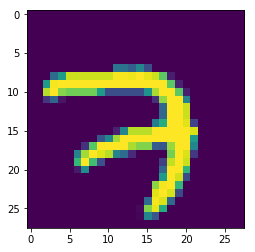

In [31]:
# AAh. So, must be 28 * 28. Let's reshape and try to plot then. 
# https://matplotlib.org/users/image_tutorial.html   ------ This tells how we could plot it.

%matplotlib inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(data.train.images[0].reshape((28,28)))
print("The img above is meant to be ",data.train.labels[0])

The img above is meant to be  [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


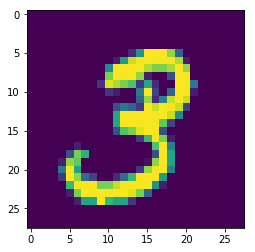

In [32]:
# Let's do another one.
imgplot2 = plt.imshow(data.train.images[1].reshape((28,28)))
print("The img above is meant to be ",data.train.labels[1])

In [33]:
# Let's check dimensions

print("Dimensions of training data X : ",data.train.images.shape)
print("Dimensions of training data Y : ",data.train.labels.shape)
print("Dimensions of training data X : ",data.validation.images.shape)
print("Dimensions of training data Y : ",data.validation.labels.shape)
print("Dimensions of training data X : ",data.test.images.shape)
print("Dimensions of training data Y : ",data.test.labels.shape)

Dimensions of training data X :  (55000, 784)
Dimensions of training data Y :  (55000, 10)
Dimensions of training data X :  (5000, 784)
Dimensions of training data Y :  (5000, 10)
Dimensions of training data X :  (10000, 784)
Dimensions of training data Y :  (10000, 10)


**So, every row here represents an image / one_hot_label. Instead of a column. This is where it differs from the deeplearning.ai course**

## Linear Model

### Without Mini-Batches

In [45]:
# code to add
X1 = tf.placeholder(tf.float32, [784, None])
Y1 = tf.placeholder(tf.float32, [10, None])

# Model is simple W*X + b. 
# IMPORTANT : If say we're doing for 55000 examples. W would be 10x784, X is 784x55000,  b should ideally be 10,55000. But 55000 is not known from before.
# So, the point is, 'Variable' needs initialization which can not have 'None'. So, how do we fix this?
# Just keep it as dimension - (10,1). Python, numpy, tf ---- let them do BROADCASTING :-)

W1 = tf.Variable(tf.zeros((10,784)))
b1 = tf.Variable(tf.zeros((10,1)))           

Z1 = tf.matmul(W1,X1) + b1

# We'll do a softmax for this so that ever number comes b/w 0 and 1. Together they should sum up to 1. Normalization.
Y1_pred_softmax = tf.nn.softmax(Z1)
Y1_pred_sigmoid = tf.nn.sigmoid(Z1)


cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z1, labels=Y1)
# Reduce cost to just one number. 
cost_mean = tf.reduce_mean(cost) 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost_mean)

session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

# 1000 epochs 
for i in range(20):
    session.run(optimizer, feed_dict={X1:data.train.images.T, Y1:data.train.labels.T})
    if i%5 == 0:
        print("cost at ",i,"th iteration is : ",session.run(cost_mean, feed_dict={X1:data.train.images.T, Y1:data.train.labels.T}))

cost at  0 th iteration is :  0.586658
cost at  5 th iteration is :  0.391887
cost at  10 th iteration is :  0.342949
cost at  15 th iteration is :  0.321183


### Without mini-batches, more epochs

In [46]:
# code to add
X1 = tf.placeholder(tf.float32, [784, None])
Y1 = tf.placeholder(tf.float32, [10, None])

# Model is simple W*X + b. 
# IMPORTANT : If say we're doing for 55000 examples. W would be 10x784, X is 784x55000,  b should ideally be 10,55000. But 55000 is not known from before.
# So, the point is, 'Variable' needs initialization which can not have 'None'. So, how do we fix this?
# Just keep it as dimension - (10,1). Python, numpy, tf ---- let them do BROADCASTING :-)

W1 = tf.Variable(tf.zeros((10,784)))
b1 = tf.Variable(tf.zeros((10,1)))           

Z1 = tf.matmul(W1,X1) + b1

# We'll do a softmax for this so that ever number comes b/w 0 and 1. Together they should sum up to 1. Normalization.
Y1_pred_softmax = tf.nn.softmax(Z1)
Y1_pred_sigmoid = tf.nn.sigmoid(Z1)


cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z1, labels=Y1)
# Reduce cost to just one number. 
cost_mean = tf.reduce_mean(cost) 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost_mean)

session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

# 1000 epochs 
for i in range(100):
    session.run(optimizer, feed_dict={X1:data.train.images.T, Y1:data.train.labels.T})
    if i%5 == 0:
        print("cost at ",i,"th iteration is : ",session.run(cost_mean, feed_dict={X1:data.train.images.T, Y1:data.train.labels.T}))

cost at  0 th iteration is :  0.586658
cost at  5 th iteration is :  0.391887
cost at  10 th iteration is :  0.342949
cost at  15 th iteration is :  0.321183
cost at  20 th iteration is :  0.307678
cost at  25 th iteration is :  0.297502
cost at  30 th iteration is :  0.288973
cost at  35 th iteration is :  0.281426
cost at  40 th iteration is :  0.274557
cost at  45 th iteration is :  0.268211
cost at  50 th iteration is :  0.262309
cost at  55 th iteration is :  0.256788
cost at  60 th iteration is :  0.251614
cost at  65 th iteration is :  0.246754
cost at  70 th iteration is :  0.242181
cost at  75 th iteration is :  0.237871
cost at  80 th iteration is :  0.233806
cost at  85 th iteration is :  0.229963
cost at  90 th iteration is :  0.226329
cost at  95 th iteration is :  0.222887


### With mini-batches

In [50]:
# code to add
X1 = tf.placeholder(tf.float32, [784, None])
Y1 = tf.placeholder(tf.float32, [10, None])

# Model is simple W*X + b. 
# IMPORTANT : If say we're doing for 55000 examples. W would be 10x784, X is 784x55000,  b should ideally be 10,55000. But 55000 is not known from before.
# So, the point is, 'Variable' needs initialization which can not have 'None'. So, how do we fix this?
# Just keep it as dimension - (10,1). Python, numpy, tf ---- let them do BROADCASTING :-)

W1 = tf.Variable(tf.zeros((10,784)))
b1 = tf.Variable(tf.zeros((10,1)))           

Z1 = tf.matmul(W1,X1) + b1

# We'll do a softmax for this so that ever number comes b/w 0 and 1. Together they should sum up to 1. Normalization.
Y1_pred_softmax = tf.nn.softmax(Z1)
Y1_pred_sigmoid = tf.nn.sigmoid(Z1)


cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z1, labels=Y1)
# Reduce cost to just one number. 
cost_mean = tf.reduce_mean(cost) 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost_mean)

session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

# mini-batches of 1000 (so 55 mini-batches)
for i in range(20):
    for t in range(55):
        X_batch, Y_batch = data.train.next_batch(1000)
        session.run(optimizer, feed_dict={X1:X_batch.T, Y1:Y_batch.T})
    if i%5 == 0:
        print("cost at ",i,"th iteration is : ",session.run(cost_mean, feed_dict={X1:data.train.images.T, Y1:data.train.labels.T}))

cost at  0 th iteration is :  0.257947
cost at  5 th iteration is :  0.15263
cost at  10 th iteration is :  0.128502
cost at  15 th iteration is :  0.116752


### With Adam instead of gradient descent

In [51]:
# code to add
X1 = tf.placeholder(tf.float32, [784, None])
Y1 = tf.placeholder(tf.float32, [10, None])

# Model is simple W*X + b. 
# IMPORTANT : If say we're doing for 55000 examples. W would be 10x784, X is 784x55000,  b should ideally be 10,55000. But 55000 is not known from before.
# So, the point is, 'Variable' needs initialization which can not have 'None'. So, how do we fix this?
# Just keep it as dimension - (10,1). Python, numpy, tf ---- let them do BROADCASTING :-)

W1 = tf.Variable(tf.zeros((10,784)))
b1 = tf.Variable(tf.zeros((10,1)))           

Z1 = tf.matmul(W1,X1) + b1

# We'll do a softmax for this so that ever number comes b/w 0 and 1. Together they should sum up to 1. Normalization.
Y1_pred_softmax = tf.nn.softmax(Z1)
Y1_pred_sigmoid = tf.nn.sigmoid(Z1)


cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z1, labels=Y1)
# Reduce cost to just one number. 
cost_mean = tf.reduce_mean(cost) 

optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost_mean)

session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

# mini-batches of 1000 (so 55 mini-batches)
for i in range(25):
    for t in range(55):
        X_batch, Y_batch = data.train.next_batch(1000)
        session.run(optimizer, feed_dict={X1:X_batch.T, Y1:Y_batch.T})
    if i%5 == 0:
        print("cost at ",i,"th iteration is : ",session.run(cost_mean, feed_dict={X1:data.train.images.T, Y1:data.train.labels.T}))

cost at  0 th iteration is :  0.14534
cost at  5 th iteration is :  0.0687919
cost at  10 th iteration is :  0.0697996
cost at  15 th iteration is :  0.0731332


**Observations**
- Mini-batch obviously works better!
- AdamOptizer is damn fast. But obviously, now your cost could increase/decrease a bit 

In [10]:
%%monitor_cell "MNIST 2 layer NN"
## 2 Layer NN

# code to add
X1 = tf.placeholder(tf.float32, [784, None], name='X1')
Y1 = tf.placeholder(tf.float32, [10, None], name='Y1')
Y1_cls = tf.argmax(Y1, axis=0)

W1 = tf.Variable(tf.random_normal((100,784)))
b1 = tf.Variable(tf.zeros((1,1)))           

W2 = tf.Variable(tf.random_normal((10,100)))
b2 = tf.Variable(tf.zeros((1,1)))

Z1 = tf.matmul(W1,X1) + b1
A1 = tf.nn.relu(Z1)

Z2 = tf.matmul(W2,A1) + b2
A2 = tf.nn.softmax(Z2)

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z2, labels=Y1)
# Reduce cost to just one number. 
cost_mean = tf.reduce_mean(cost) 

optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost_mean)

# We'll do a softmax for this so that ever number comes b/w 0 and 1. Together they should sum up to 1. Normalization.
Y2_pred_axis0 = tf.argmax(A2, axis=0)


session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

# mini-batches of 1000 (so 55 mini-batches)
for i in range(3000):
    X_batch, Y_batch = data.train.next_batch(1000)
    _, cost_mean_val, shapeZ2,pred_axis0 = session.run([optimizer,cost_mean,tf.shape(Z2),Y2_pred_axis0], feed_dict={X1:X_batch.T, Y1:Y_batch.T})
    if i%5 == 0:
        print("cost at ",i,"th iteration is : ",cost_mean_val,shapeZ2)

correct_prediction = tf.equal(Y2_pred_axis0, Y1_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("training accuracy : ",session.run(accuracy, feed_dict={X1:data.train.images.T, Y1:data.train.labels.T}))
print("testing accuracy : ",session.run(accuracy, feed_dict={X1:data.test.images.T, Y1:data.test.labels.T}))

cost at  0 th iteration is :  25.2978 [  10 1000]
cost at  5 th iteration is :  6.38793 [  10 1000]
cost at  10 th iteration is :  4.77624 [  10 1000]
cost at  15 th iteration is :  3.20396 [  10 1000]
cost at  20 th iteration is :  2.08947 [  10 1000]
cost at  25 th iteration is :  1.65479 [  10 1000]
cost at  30 th iteration is :  1.39821 [  10 1000]
cost at  35 th iteration is :  1.04432 [  10 1000]
cost at  40 th iteration is :  1.07579 [  10 1000]
cost at  45 th iteration is :  0.855806 [  10 1000]
cost at  50 th iteration is :  0.753868 [  10 1000]
cost at  55 th iteration is :  0.728713 [  10 1000]
cost at  60 th iteration is :  0.766429 [  10 1000]
cost at  65 th iteration is :  0.682939 [  10 1000]
cost at  70 th iteration is :  0.66986 [  10 1000]
cost at  75 th iteration is :  0.574747 [  10 1000]
cost at  80 th iteration is :  0.609634 [  10 1000]
cost at  85 th iteration is :  0.672206 [  10 1000]
cost at  90 th iteration is :  0.530539 [  10 1000]
cost at  95 th iteration

In [ ]:
print("hh1")